In [11]:
%run Global.ipynb
%run Helper_Functions.ipynb

In [8]:
train_df_oe = pd.read_csv(DATASET_DIR + "/train_df_oe.csv", keep_default_na=False)

y = train_df_oe.iloc[:,-1]
X = train_df_oe.iloc[:,:-1]

# Boosting with Decision Trees

In [3]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=30027)

In [4]:
# Tuning using GridSearch
param_grid = {
    'learning_rate': (0.01, 0.1, 1, 10),
    'max_leaf_nodes': (3, 10, 30)}
cv_results = tune_hyperparameter(hgb, param_grid, X, y, cv=5)
cv_results
# 'Best' param set: learning_rate = 0.1, max_leaf_nodes = 10

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ...............learning_rate=0.01, max_leaf_nodes=3; total time=  10.7s
[CV] END ...............learning_rate=0.01, max_leaf_nodes=3; total time=   5.5s
[CV] END ...............learning_rate=0.01, max_leaf_nodes=3; total time=   5.2s
[CV] END ...............learning_rate=0.01, max_leaf_nodes=3; total time=   5.0s
[CV] END ...............learning_rate=0.01, max_leaf_nodes=3; total time=   5.4s
[CV] END ..............learning_rate=0.01, max_leaf_nodes=10; total time=   9.1s
[CV] END ..............learning_rate=0.01, max_leaf_nodes=10; total time=   9.0s
[CV] END ..............learning_rate=0.01, max_leaf_nodes=10; total time=   9.2s
[CV] END ..............learning_rate=0.01, max_leaf_nodes=10; total time=   9.4s
[CV] END ..............learning_rate=0.01, max_leaf_nodes=10; total time=   9.1s
[CV] END ..............learning_rate=0.01, max_leaf_nodes=30; total time=  17.4s
[CV] END ..............learning_rate=0.01, max_l

,params,mean_test_3.0_precision,std_test_3.0_precision,rank_test_3.0_precision,mean_test_3.0_recall,std_test_3.0_recall,rank_test_3.0_recall,mean_test_3.0_f1-score,std_test_3.0_f1-score,rank_test_3.0_f1-score,...,rank_test_5.0_precision,mean_test_5.0_recall,std_test_5.0_recall,rank_test_5.0_recall,mean_test_5.0_f1-score,std_test_5.0_f1-score,rank_test_5.0_f1-score,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
0,"{'learning_rate': 0.01, 'max_leaf_nodes': 3}",0.000000,0.000000,12,0.000000,0.000000,12,0.000000,0.000000,12,...,11,0.000000,0.000000,11,0.000000,0.000000,11,0.702771,0.000032,6
1,"{'learning_rate': 0.01, 'max_leaf_nodes': 10}",0.650000,0.206828,3,0.002387,0.001131,11,0.004756,0.002249,11,...,2,0.024202,0.008614,10,0.046949,0.016311,8,0.703985,0.000213,5
2,"{'learning_rate': 0.01, 'max_leaf_nodes': 30}",0.661616,0.124616,2,0.011255,0.004556,9,0.022010,0.008625,9,...,1,0.027222,0.012523,9,0.052580,0.023486,7,0.704895,0.000912,3
3,"{'learning_rate': 0.1, 'max_leaf_nodes': 3}",0.705606,0.148747,1,0.004946,0.003024,10,0.009786,0.005928,10,...,3,0.032272,0.011257,7,0.061958,0.021003,5,0.704505,0.000792,4
4,"{'learning_rate': 0.1, 'max_leaf_nodes': 10}",0.603557,0.061932,4,0.025412,0.009308,8,0.048386,0.017002,8,...,4,0.032272,0.011257,7,0.061802,0.020842,6,0.705719,0.000835,1
5,"{'learning_rate': 0.1, 'max_leaf_nodes': 30}",0.531353,0.036924,5,0.039394,0.007069,7,0.073176,0.012357,7,...,5,0.033283,0.011706,6,0.063298,0.021361,4,0.704939,0.001152,2
6,"{'learning_rate': 1, 'max_leaf_nodes': 3}",0.414137,0.042195,6,0.042291,0.010377,6,0.076538,0.017550,6,...,6,0.057520,0.007575,4,0.100202,0.010493,1,0.698175,0.001601,7
7,"{'learning_rate': 1, 'max_leaf_nodes': 10}",0.405792,0.024817,7,0.053205,0.009916,5,0.093834,0.015664,5,...,7,0.041399,0.026625,5,0.067301,0.042832,3,0.693058,0.002263,8
8,"{'learning_rate': 1, 'max_leaf_nodes': 30}",0.361027,0.027719,8,0.095670,0.008977,4,0.151206,0.013404,4,...,8,0.065586,0.022571,3,0.089325,0.025083,2,0.676625,0.003967,9
9,"{'learning_rate': 10, 'max_leaf_nodes': 3}",0.196360,0.003697,10,0.347716,0.006711,1,0.250984,0.004737,1,...,11,0.000000,0.000000,11,0.000000,0.000000,11,0.452456,0.003459,11


In [5]:
# 2nd go
hgb = HistGradientBoostingClassifier(random_state=30027, learning_rate=0.1)
param_grid = {
    'max_leaf_nodes': range(10, 30, 2)}
cv_results = tune_hyperparameter(hgb, param_grid, X, y, cv=5)
cv_results
# 'Best' param set: learning_rate = 0.01, max_leaf_nodes = 10

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ..................................max_leaf_nodes=10; total time=   2.6s
[CV] END ..................................max_leaf_nodes=10; total time=   2.9s
[CV] END ..................................max_leaf_nodes=10; total time=   7.7s
[CV] END ..................................max_leaf_nodes=10; total time=   3.6s
[CV] END ..................................max_leaf_nodes=10; total time=   6.2s
[CV] END ..................................max_leaf_nodes=12; total time=   2.7s
[CV] END ..................................max_leaf_nodes=12; total time=   2.9s
[CV] END ..................................max_leaf_nodes=12; total time=   6.6s
[CV] END ..................................max_leaf_nodes=12; total time=   2.9s
[CV] END ..................................max_leaf_nodes=12; total time=   6.7s
[CV] END ..................................max_leaf_nodes=14; total time=   3.6s
[CV] END ..................................max_l

,params,mean_test_3.0_precision,std_test_3.0_precision,rank_test_3.0_precision,mean_test_3.0_recall,std_test_3.0_recall,rank_test_3.0_recall,mean_test_3.0_f1-score,std_test_3.0_f1-score,rank_test_3.0_f1-score,...,rank_test_5.0_precision,mean_test_5.0_recall,std_test_5.0_recall,rank_test_5.0_recall,mean_test_5.0_f1-score,std_test_5.0_f1-score,rank_test_5.0_f1-score,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
0,{'max_leaf_nodes': 10},0.603557,0.061932,1,0.025412,0.009308,9,0.048386,0.017002,9,...,4,0.032272,0.011257,2,0.061802,0.020842,3,0.705719,0.000835,6
1,{'max_leaf_nodes': 12},0.588347,0.066966,2,0.024729,0.008274,10,0.047145,0.015160,10,...,1,0.033283,0.010316,1,0.063691,0.018910,1,0.705502,0.000500,8
2,{'max_leaf_nodes': 14},0.554565,0.041126,7,0.027970,0.009858,8,0.053015,0.017883,8,...,5,0.030252,0.011428,10,0.057907,0.020890,10,0.705372,0.001654,9
3,{'max_leaf_nodes': 16},0.574506,0.053559,3,0.034962,0.010070,6,0.065563,0.017932,6,...,3,0.032272,0.011257,2,0.061778,0.020719,4,0.706153,0.001754,1
4,{'max_leaf_nodes': 18},0.539613,0.038178,10,0.032061,0.004941,7,0.060437,0.008803,7,...,2,0.032272,0.010311,2,0.061821,0.018964,2,0.705199,0.001120,10
5,{'max_leaf_nodes': 20},0.558291,0.027603,5,0.038371,0.008752,4,0.071578,0.015461,4,...,9,0.031262,0.011162,8,0.059578,0.020123,9,0.705893,0.000889,3
6,{'max_leaf_nodes': 22},0.560055,0.046884,4,0.035814,0.006115,5,0.067178,0.010713,5,...,7,0.032272,0.011702,2,0.061507,0.021247,7,0.705762,0.001196,5
7,{'max_leaf_nodes': 24},0.555644,0.033447,6,0.038542,0.008285,3,0.071834,0.014505,3,...,10,0.032272,0.011257,2,0.061610,0.020726,6,0.705806,0.001118,4
8,{'max_leaf_nodes': 26},0.545520,0.042525,8,0.038881,0.009316,2,0.072307,0.016419,2,...,8,0.031262,0.011162,8,0.059832,0.020743,8,0.705546,0.001714,7
9,{'max_leaf_nodes': 28},0.544978,0.030987,9,0.045024,0.012215,1,0.082771,0.020543,1,...,6,0.032272,0.011257,2,0.061649,0.020684,5,0.705893,0.001562,2


HistGradientBoostingClassifier prediction took 72.41480898857117 seconds
   test_3.0_f1-score  test_4.0_f1-score  test_5.0_f1-score  test_accuracy
0           0.051696           0.823832           0.019802       0.702644
1           0.089506           0.822768           0.039604       0.702644
2           0.061389           0.825103           0.074766       0.705245
3           0.068071           0.827763           0.095238       0.709454
4           0.080000           0.827711           0.076923       0.709454
5           0.092063           0.827871           0.112150       0.710755
6           0.055556           0.827515           0.076923       0.708153
7           0.052117           0.824949           0.019608       0.704250
8           0.052117           0.825886           0.076923       0.705984
9           0.076312           0.826289           0.077670       0.707285


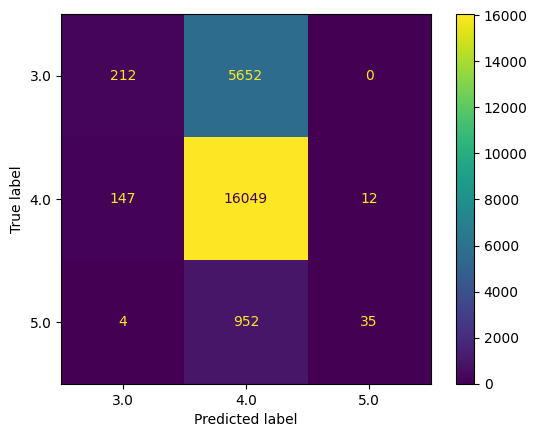

test_3.0_f1-score    0.067883
test_4.0_f1-score    0.825969
test_5.0_f1-score    0.066961
test_accuracy        0.706587
dtype: float64

In [9]:
hgb = HistGradientBoostingClassifier(random_state=30027, max_leaf_nodes=16, learning_rate=0.1)
hgb.fit(X, y)
cross_val_report(hgb, X, y)[1]

## Attempt 2: Using selected features

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

selector = SequentialFeatureSelector(hgb, scoring='accuracy', tol=0.005, n_features_to_select='auto').fit(X, y)
selected_features = [X.columns[i] for i in range(X.shape[1]) if selector.get_support()[i]]
print(len(selected_features), "features selected")
X_filtered = X[selected_features]